# Business Understanding

## Introduction

The telecom company has provided access to three different datasets for a classification project. The first dataset consists of 3000 records and is stored in a remote database hosted on Microsoft SQL Server. The second dataset contains 2000 records and is stored on OneDrive. The third dataset is hosted on a GitHub repository.

## Objectives of the project

To assist the telecom company understand their data: The project aims to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, the project aims to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The project involves developing a predictive model to determine whether a customer is likely to churn or not. By using machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., the project aims to build a model that accurately predicts customer churn.

## Methodology

To achieve these objectives, the project will follow the CRISP-DM framework and involve the following steps:

Data exploration: Explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide an initial understanding of the data and help identify any data quality issues.

Missing value computations: Identify missing values in the datasets and decide on an appropriate strategy for handling them, such as imputation or removal of missing data points.

Feature engineering: Perform feature engineering to transform and create new variables that can potentially improve the predictive power of the models. This step may involve encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: Utilize machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. Train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: Evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: Fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

## Hypothesis
H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Understanding

## Load Datasets

In [251]:
# Required Installations
# %pip install python-dotenv
# %pip install pyodbc

In [252]:
# Import necessary packages
import pyodbc
from dotenv import dotenv_values
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Prediction
from sklearn.metrics import confusion_matrix

In [253]:
# Load environment variables from the .env file into a dictionary
env_variables = dotenv_values('.env') 

# Get credentials from .env file
server = env_variables.get("SERVER")
database = env_variables.get("DATABASE")
username = env_variables.get("USERNAME")
password = env_variables.get("PASSWORD")

conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)


### Load first dataset (database file)

In [254]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)


In [255]:
# Close connection
conn.close()


### Load second dataset (test file)

In [256]:
# Read the excel file into a pandas dataframe
df_test = pd.read_excel('Telco-churn-second-2000.xlsx')


### Load third dataset (csv file)

In [257]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Data Exploration

## Preprocessing

In [258]:
# View the datasets (df_db)
df_db

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [259]:
# View the datasets (df_csv)
df_csv

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [260]:
# View the datasets (df_test)
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [261]:
# Shapes of the datasets (number of rows and columns in each dataset)
print(df_db.shape)
print(df_csv.shape)
print(df_test.shape)

(3000, 21)
(2043, 21)
(2000, 20)


In [262]:
# Check uniqueness of non-numeric columns 
 
# List of columns to get unique values from
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

# Iterate over the columns and print unique values
print("df_db unique values")
for column in non_numeric_columns:
    unique_values = df_db[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()
print("\n")
print("df_csv uniques values")
for column in non_numeric_columns:
    unique_values = df_csv[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()
print("\n")
print("df_test unique values")
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']
# Iterate over the columns and print unique values
for column in non_numeric_columns:
    unique_values = df_test[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

df_db unique values
Unique values in column gender:
['Female' 'Male']

Unique values in column SeniorCitizen:
[False  True]

Unique values in column Partner:
[ True False]

Unique values in column Dependents:
[False  True]

Unique values in column PhoneService:
[False  True]

Unique values in column MultipleLines:
[None False True]

Unique values in column InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in column OnlineSecurity:
[False True None]

Unique values in column OnlineBackup:
[True False None]

Unique values in column DeviceProtection:
[False True None]

Unique values in column TechSupport:
[False True None]

Unique values in column StreamingTV:
[False True None]

Unique values in column StreamingMovies:
[False True None]

Unique values in column Contract:
['Month-to-month' 'One year' 'Two year']

Unique values in column PaperlessBilling:
[ True False]

Unique values in column PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

In [263]:
# Check the data types
print("df_db data types")
print(df_db.dtypes)
print()
print("df_csv data types")
print(df_csv.dtypes)
print()
print("df_test data types")
print(df_test.dtypes)

df_db data types
customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

df_csv data types
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          objec

In [264]:
# Convert TotalCharges column in df_test to float64
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_test Data Types:")
print(df_test.dtypes)
print()

# Convert TotalCharges column in df_csv to float64
df_csv['TotalCharges'] = pd.to_numeric(df_csv['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_csv Data Types:")
print(df_csv.dtypes)

df_test Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

df_csv Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          o

In [265]:
# Summary statistics
print("df_db summary stats")
print(df_db.describe())
print("\n")
print("df_csv summary stats")
print(df_csv.describe())
print("\n")
print("df_test summary stats")
print(df_test.describe())

df_db summary stats
            tenure  MonthlyCharges  TotalCharges
count  3000.000000     3000.000000   2995.000000
mean     32.527333       65.347400   2301.278315
std      24.637768       30.137053   2274.987884
min       0.000000       18.400000     18.799999
25%       9.000000       35.787499    415.250000
50%      29.000000       70.900002   1404.650024
75%      56.000000       90.262501   3868.725098
max      72.000000      118.650002   8564.750000


df_csv summary stats
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    2043.000000  2043.000000     2043.000000   2040.000000
mean        0.168380    32.649046       64.712555   2303.214681
std         0.374295    24.376248       29.970010   2261.934905
min         0.000000     0.000000       18.550000     18.850000
25%         0.000000     9.000000       35.825000    434.250000
50%         0.000000    30.000000       70.250000   1398.275000
75%         0.000000    55.000000       89.625000   3846.962500
max 

In [266]:
### Handling Missing Values
# Analyze missing values in df_db
missing_values_db = df_db.isnull().sum()
missing_percentage_db = (missing_values_db / len(df_db)) * 100
missing_summary_db = missing_values_db.astype(str) + " (" + missing_percentage_db.round(2).astype(str) + "%)"

# Analyze missing values in df_csv
missing_values_csv = df_csv.isnull().sum()
missing_percentage_csv = (missing_values_csv / len(df_csv)) * 100
missing_summary_csv = missing_values_csv.astype(str) + " (" + missing_percentage_csv.round(2).astype(str) + "%)"

# Analyze missing values in df_test
missing_values_test = df_test.isnull().sum()
missing_percentage_test = (missing_values_test / len(df_test)) * 100
missing_summary_test = missing_values_test.astype(str) + " (" + missing_percentage_test.round(2).astype(str) + "%)"

# Print the missing values information
print("Missing Values in df_db:")
print(missing_summary_db)
print()

print("Missing Values in df_csv:")
print(missing_summary_csv)
print()

print("Missing Values in df_test:")
print(missing_summary_test)
print()


Missing Values in df_db:
customerID             0 (0.0%)
gender                 0 (0.0%)
SeniorCitizen          0 (0.0%)
Partner                0 (0.0%)
Dependents             0 (0.0%)
tenure                 0 (0.0%)
PhoneService           0 (0.0%)
MultipleLines       269 (8.97%)
InternetService        0 (0.0%)
OnlineSecurity      651 (21.7%)
OnlineBackup        651 (21.7%)
DeviceProtection    651 (21.7%)
TechSupport         651 (21.7%)
StreamingTV         651 (21.7%)
StreamingMovies     651 (21.7%)
Contract               0 (0.0%)
PaperlessBilling       0 (0.0%)
PaymentMethod          0 (0.0%)
MonthlyCharges         0 (0.0%)
TotalCharges          5 (0.17%)
Churn                 1 (0.03%)
dtype: object

Missing Values in df_csv:
customerID           0 (0.0%)
gender               0 (0.0%)
SeniorCitizen        0 (0.0%)
Partner              0 (0.0%)
Dependents           0 (0.0%)
tenure               0 (0.0%)
PhoneService         0 (0.0%)
MultipleLines        0 (0.0%)
InternetService      0

df_db
Value Counts for MultipleLines:
False    1437
True     1294
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
False    1478
True      871
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
False    1320
True     1029
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
False    1296
True     1053
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
False    1476
True      873
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
False    1190
True     1159
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
True     1199
False    1150
Name: StreamingMovies, dtype: int64



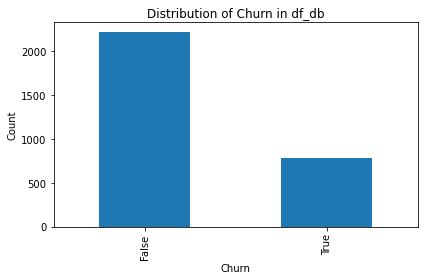

df_csv
Value Counts for MultipleLines:
No                  987
Yes                 836
No phone service    220
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
No                     1029
Yes                     585
No internet service     429
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
No                     911
Yes                    703
No internet service    429
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
No                     923
Yes                    691
No internet service    429
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
No                     996
Yes                    618
No internet service    429
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
No                     828
Yes                    786
No internet service    429
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
No                     831
Yes                    783
No internet service    42

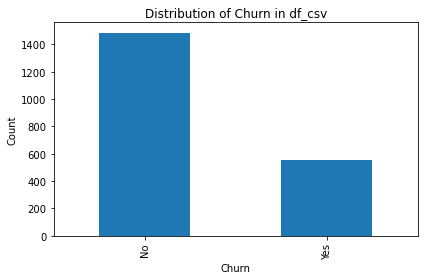

In [267]:
# Assess the data distribution for categorical columns

# Value counts for categorical columns in df_db
print("df_db")
df_db_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_db_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_db[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_db
df_db['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_db')
plt.tight_layout()
plt.show()

# Value counts for categorical columns in df_csv
print("df_csv")
df_csv_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_csv_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_csv[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_csv
df_csv['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_csv')
plt.tight_layout()
plt.show()


df_db


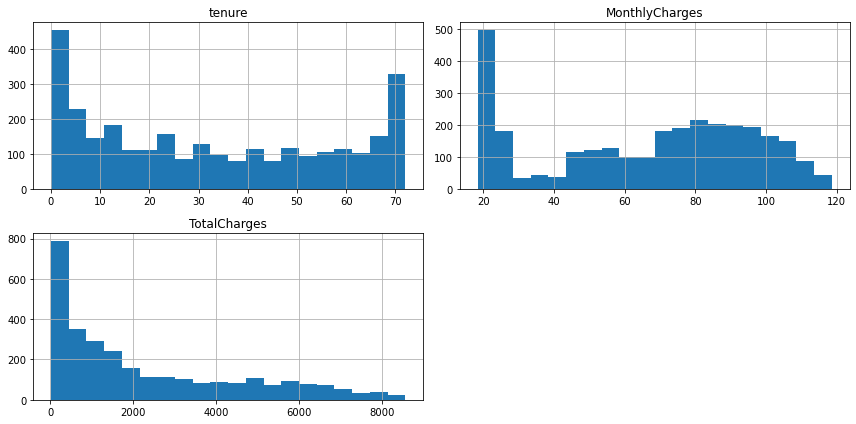

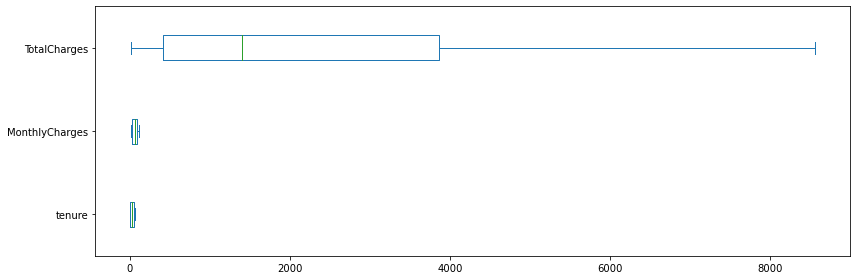

df_csv


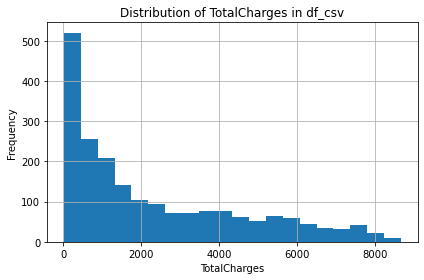

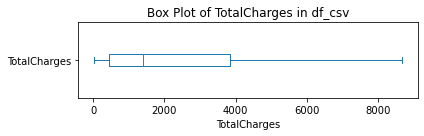

df_test


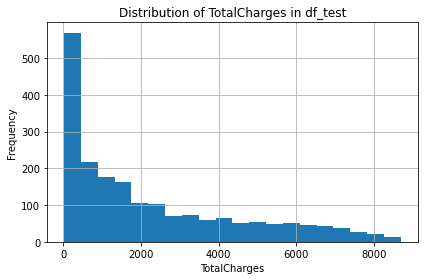

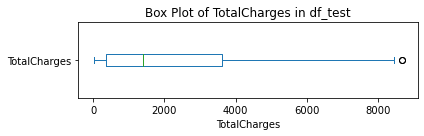

In [268]:
# Examine the distribution of columns with missing values and # assess the presence of outliers

# Assess the data distribution and outliers for numerical columns

# Histograms for numerical columns in df_db
print("df_db")
df_db_numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_db[df_db_numerical_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Box plots for numerical columns in df_db
df_db[df_db_numerical_cols].plot(kind='box', vert=False, figsize=(12, 4))
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_csv
print("df_csv")
df_csv['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_csv
df_csv['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_test
print("df_test")
df_test['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_test')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_test
df_test['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_test')
plt.tight_layout()
plt.show()

## Imputing Missing Values

In [269]:
# Impute missing values in categorical columns using mode
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_db[categorical_cols] = df_db[categorical_cols].fillna(df_db[categorical_cols].mode().iloc[0])
df_csv[categorical_cols] = df_csv[categorical_cols].fillna(df_csv[categorical_cols].mode().iloc[0])
df_test[categorical_cols] = df_test[categorical_cols].fillna(df_test[categorical_cols].mode().iloc[0])

# Impute missing values in numerical columns using median
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_db[numerical_cols] = df_db[numerical_cols].fillna(df_db[numerical_cols].median())
df_csv[numerical_cols] = df_csv[numerical_cols].fillna(df_csv[numerical_cols].median())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].median())
# Drop row with missing value in Churn column in df_db
df_db = df_db.dropna(subset=['Churn'])

# Check if any missing values remain
print("Remaining Missing Values in df_db:")
print(df_db.isnull().sum())
print()

print("Remaining Missing Values in df_csv:")
print(df_csv.isnull().sum())
print()

print("Remaining Missing Values in df_test:")
print(df_test.isnull().sum())
print()


Remaining Missing Values in df_db:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remaining Missing Values in df_csv:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn        

In [270]:
df_Customer_Churn = pd.concat([df_db, df_csv], ignore_index=True) 
df_Customer_Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5038,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5039,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5040,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [271]:
# Save df_CustomerChurn as csv
df_Customer_Churn.to_csv('Customer_Churn.csv', index=False)

## Encoding

In [272]:
# Ensure uniqueness of datasets

# Ensure uniqueness of datasets

# Perform label encoding for df_db
label_encoder_db = LabelEncoder()
df_db['gender'] = label_encoder_db.fit_transform(df_db['gender'])
df_db['SeniorCitizen'] = label_encoder_db.fit_transform(df_db['SeniorCitizen'])
df_db['Partner'] = label_encoder_db.fit_transform(df_db['Partner'])
df_db['Dependents'] = label_encoder_db.fit_transform(df_db['Dependents'])
df_db['PhoneService'] = label_encoder_db.fit_transform(df_db['PhoneService'])
df_db['MultipleLines'] = label_encoder_db.fit_transform(df_db['MultipleLines'])
df_db['InternetService'] = label_encoder_db.fit_transform(df_db['InternetService'])
df_db['OnlineSecurity'] = label_encoder_db.fit_transform(df_db['OnlineSecurity'])
df_db['OnlineBackup'] = label_encoder_db.fit_transform(df_db['OnlineBackup'])
df_db['DeviceProtection'] = label_encoder_db.fit_transform(df_db['DeviceProtection'])
df_db['TechSupport'] = label_encoder_db.fit_transform(df_db['TechSupport'])
df_db['StreamingTV'] = label_encoder_db.fit_transform(df_db['StreamingTV'])
df_db['StreamingMovies'] = label_encoder_db.fit_transform(df_db['StreamingMovies'])
df_db['Contract'] = label_encoder_db.fit_transform(df_db['Contract'])
df_db['PaperlessBilling'] = label_encoder_db.fit_transform(df_db['PaperlessBilling'])
df_db['PaymentMethod'] = label_encoder_db.fit_transform(df_db['PaymentMethod'])
df_db['Churn'] = label_encoder_db.fit_transform(df_db['Churn'])

# Perform label encoding for df_csv
label_encoder_csv = LabelEncoder()
df_csv['gender'] = label_encoder_csv.fit_transform(df_csv['gender'])
df_csv['SeniorCitizen'] = label_encoder_csv.fit_transform(df_csv['SeniorCitizen'])
df_csv['Partner'] = label_encoder_csv.fit_transform(df_csv['Partner'])
df_csv['Dependents'] = label_encoder_csv.fit_transform(df_csv['Dependents'])
df_csv['PhoneService'] = label_encoder_csv.fit_transform(df_csv['PhoneService'])
df_csv['MultipleLines'] = label_encoder_csv.fit_transform(df_csv['MultipleLines'])
df_csv['InternetService'] = label_encoder_csv.fit_transform(df_csv['InternetService'])
df_csv['OnlineSecurity'] = label_encoder_csv.fit_transform(df_csv['OnlineSecurity'])
df_csv['OnlineBackup'] = label_encoder_csv.fit_transform(df_csv['OnlineBackup'])
df_csv['DeviceProtection'] = label_encoder_csv.fit_transform(df_csv['DeviceProtection'])
df_csv['TechSupport'] = label_encoder_csv.fit_transform(df_csv['TechSupport'])
df_csv['StreamingTV'] = label_encoder_csv.fit_transform(df_csv['StreamingTV'])
df_csv['StreamingMovies'] = label_encoder_csv.fit_transform(df_csv['StreamingMovies'])
df_csv['Contract'] = label_encoder_csv.fit_transform(df_csv['Contract'])
df_csv['PaperlessBilling'] = label_encoder_csv.fit_transform(df_csv['PaperlessBilling'])
df_csv['PaymentMethod'] = label_encoder_csv.fit_transform(df_csv['PaymentMethod'])
df_csv['Churn'] = label_encoder_csv.fit_transform(df_csv['Churn'])

# Perform label encoding for df_test
label_encoder_test = LabelEncoder()
df_test['gender'] = label_encoder_test.fit_transform(df_test['gender'])
df_test['SeniorCitizen'] = label_encoder_test.fit_transform(df_test['SeniorCitizen'])
df_test['Partner'] = label_encoder_test.fit_transform(df_test['Partner'])
df_test['Dependents'] = label_encoder_test.fit_transform(df_test['Dependents'])
df_test['PhoneService'] = label_encoder_test.fit_transform(df_test['PhoneService'])
df_test['MultipleLines'] = label_encoder_test.fit_transform(df_test['MultipleLines'])
df_test['InternetService'] = label_encoder_test.fit_transform(df_test['InternetService'])
df_test['OnlineSecurity'] = label_encoder_test.fit_transform(df_test['OnlineSecurity'])
df_test['OnlineBackup'] = label_encoder_test.fit_transform(df_test['OnlineBackup'])
df_test['DeviceProtection'] = label_encoder_test.fit_transform(df_test['DeviceProtection'])
df_test['TechSupport'] = label_encoder_test.fit_transform(df_test['TechSupport'])
df_test['StreamingTV'] = label_encoder_test.fit_transform(df_test['StreamingTV'])
df_test['StreamingMovies'] = label_encoder_test.fit_transform(df_test['StreamingMovies'])
df_test['Contract'] = label_encoder_test.fit_transform(df_test['Contract'])
df_test['PaperlessBilling'] = label_encoder_test.fit_transform(df_test['PaperlessBilling'])
df_test['PaymentMethod'] = label_encoder_test.fit_transform(df_test['PaymentMethod'])

# Verify the encoded datasets
print("df_db Encoded:")
print(df_db)
print()
print("df_csv Encoded:")
print(df_csv)
print()
print("df_test Encoded:")
print(df_test)


df_db Encoded:
              customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG       0              0        1           0       1   
1             5575-GNVDE       1              0        0           0      34   
2             3668-QPYBK       1              0        0           0       2   
3             7795-CFOCW       1              0        0           0      45   
4             9237-HQITU       0              0        0           0       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF       0              0        0           0       1   
2996          6620-JDYNW       0              0        0           0      18   
2997          1891-FZYSA       1              1        1           0      69   
2998          4770-UEZOX       1              0        0           0       2   
2999  1A1:U3001038-RQOST       1              0        1           1      19   

      PhoneService  Mult

In [273]:
# Merge df_db and df_csv
df_CustomerChurn = pd.concat([df_db, df_csv], ignore_index=True) 
df_CustomerChurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.850000,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.950001,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.849998,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.299999,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.699997,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.800000,1990.500000,0
5038,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.200000,7362.900000,0
5039,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.600000,346.450000,0
5040,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.400000,306.600000,1


# Data Evaluation

Perform bivariate, multivariate analyses as well as hypothesis testing to answer the hypothesis and questions

Create visualizations to explore relationships, collinearity, churn rate, distributions, and other relevant factors.

Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, 
    and payment methods.
    
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

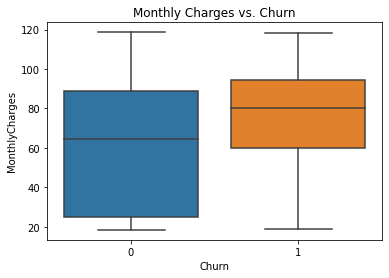

Contingency Table 1:
MonthlyCharges  (18.398999999999997, 25.1]  (25.1, 59.57]  (59.57, 79.3]  \
Churn                                                                      
0                                      926            760            705   
1                                       85            246            304   

MonthlyCharges  (79.3, 94.39]  (94.39, 118.65]  
Churn                                           
0                         650              665  
1                         357              344  

Question 1 - Monthly Charges and Churn:
Chi-square statistic: 250.20740551595975
P-value: 5.873271341026506e-53
There is a significant relationship between monthly charges and churn.


In [274]:
# Question 1: Is there a relationship between the monthly charges and the likelihood of churn?

# Bivariate analysis using box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_CustomerChurn)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Hypothesis testing

# Step 1: Create a contingency table
contingency_table_1 = pd.crosstab(df_CustomerChurn['Churn'], pd.qcut(df_CustomerChurn['MonthlyCharges'], q=5))
print("Contingency Table 1:")
print(contingency_table_1)

# Step 2: Perform chi-square test
chi2_1, p_value_1, _, _ = chi2_contingency(contingency_table_1)

# Step 3: Interpret the results
alpha = 0.05  # Set the significance level
print("\nQuestion 1 - Monthly Charges and Churn:")
print(f"Chi-square statistic: {chi2_1}")
print(f"P-value: {p_value_1}")
if p_value_1 < alpha:
    print("There is a significant relationship between monthly charges and churn.")
else:
    print("There is no significant relationship between monthly charges and churn.")

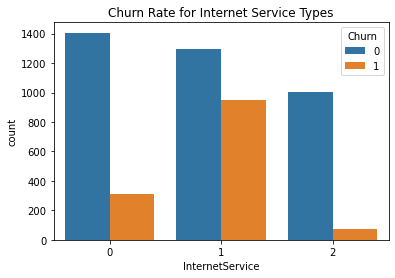


Contingency Table 2:
InternetService     0     1     2
Churn                            
0                1406  1296  1004
1                 309   951    76

Question 2 - Internet Service and Churn:
Chi-square statistic: 562.2698920653917
P-value: 8.028682205375917e-123
There is a significant relationship between internet service and churn.


In [275]:
# Question 2:
# Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

# Bivariate analysis using bar plot
sns.countplot(x='InternetService', hue='Churn', data=df_CustomerChurn)
plt.title("Churn Rate for Internet Service Types")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_2 = pd.crosstab(df_CustomerChurn['Churn'], df_CustomerChurn['InternetService'])
print("\nContingency Table 2:")
print(contingency_table_2)

# Step 2: Perform chi-square test
chi2_2, p_value_2, _, _ = chi2_contingency(contingency_table_2)

# Step 3: Interpret the results
print("\nQuestion 2 - Internet Service and Churn:")
print(f"Chi-square statistic: {chi2_2}")
print(f"P-value: {p_value_2}")
if p_value_2 < alpha:
    print("There is a significant relationship between internet service and churn.")
else:
    print("There is no significant relationship between internet service and churn.")

Online Security


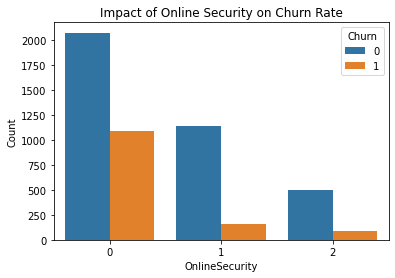

Chi-square test results for Online Security:
Chi-square statistic: 269.9214113760607
P-value: 2.4395529336858987e-59
There is a significant relationship between online security and churn.
Online Backup


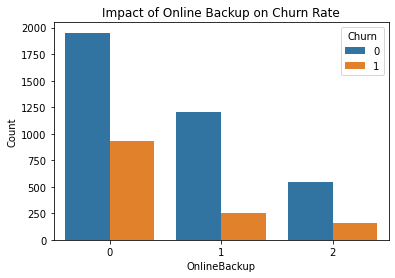

Chi-square test results for Online Backup:
Chi-square statistic: 120.24575768974834
P-value: 7.744002447033019e-27
There is a significant relationship between online backup and churn.
Device Protection


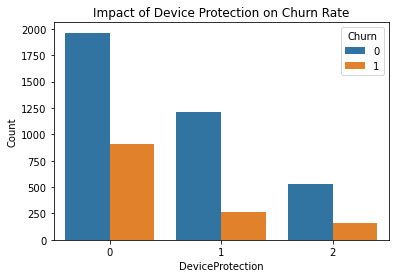

Chi-square test results for Device Protection:
Chi-square statistic: 95.42790146151326
P-value: 1.8971186253297125e-21
There is a significant relationship between device protection and churn.
Tech Support


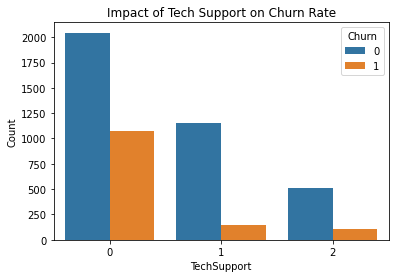

Chi-square test results for Tech Support:
Chi-square statistic: 280.45024954759054
P-value: 1.2618335969914151e-61
There is a significant relationship between tech support and churn.


In [276]:
# Question 3a: Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

# Online Security

print ("Online Security")
# Generate the count plot
df_online_security = df_CustomerChurn[['OnlineSecurity', 'Churn']]
df_online_security = df_online_security.replace({True: 'Yes', False: 'No'})
df_online_security = df_online_security.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='OnlineSecurity', y='Count', hue='Churn', data=df_online_security, orient='v')
plt.title("Impact of Online Security on Churn Rate")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_CustomerChurn['OnlineSecurity'], df_CustomerChurn['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Security:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online security and churn.")
else:
    print("There is no significant relationship between online security and churn.")
    
    
# Online backup

print ("Online Backup")
# Generate the count plot
df_online_backup = df_CustomerChurn[['OnlineBackup', 'Churn']]
df_online_backup = df_online_backup.replace({True: 'Yes', False: 'No'})
df_online_backup = df_online_backup.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='OnlineBackup', y='Count', hue='Churn', data=df_online_backup, orient='v')
plt.title("Impact of Online Backup on Churn Rate")
plt.xlabel("OnlineBackup")
plt.ylabel("Count")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_CustomerChurn['OnlineBackup'], df_CustomerChurn['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Backup:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online backup and churn.")
else:
    print("There is no significant relationship between online backup and churn.")
    

# Device Protection

print ("Device Protection")
## Generate the count plot
df_device_protection = df_CustomerChurn[['DeviceProtection', 'Churn']]
df_device_protection = df_device_protection.replace({True: 'Yes', False: 'No'})
df_device_protection = df_device_protection.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='DeviceProtection', y='Count', hue='Churn', data=df_device_protection, orient='v')
plt.title("Impact of Device Protection on Churn Rate")
plt.xlabel("DeviceProtection")
plt.ylabel("Count")
plt.show()

## Perform chi-square test for independence
contingency_table = pd.crosstab(df_CustomerChurn['DeviceProtection'], df_CustomerChurn['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Device Protection:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


if p_value < alpha:
    print("There is a significant relationship between device protection and churn.")
else:
    print("There is no significant relationship between device protection and churn.")

# Tech Support

print ("Tech Support")
# Generate the count plot
df_tech_support = df_CustomerChurn[['TechSupport', 'Churn']]
df_tech_support = df_tech_support.replace({True: 'Yes', False: 'No'})
df_tech_support = df_tech_support.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='TechSupport', y='Count', hue='Churn', data=df_tech_support, orient='v')
plt.title("Impact of Tech Support on Churn Rate")
plt.xlabel("TechSupport")
plt.ylabel("Count")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_CustomerChurn['TechSupport'], df_CustomerChurn['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Tech Support:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between tech support and churn.")
else:
    print("There is no significant relationship between tech support and churn.")

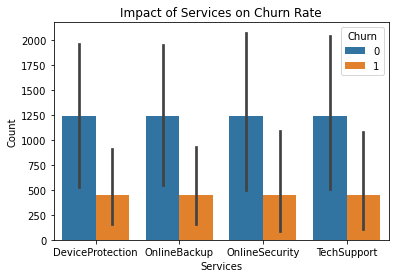

Chi-square test results for OnlineSecurity:
Chi-square statistic: 269.9214113760607
P-value: 2.4395529336858987e-59
There is a significant relationship between OnlineSecurity and churn.
Chi-square test results for OnlineBackup:
Chi-square statistic: 120.24575768974834
P-value: 7.744002447033019e-27
There is a significant relationship between OnlineBackup and churn.
Chi-square test results for DeviceProtection:
Chi-square statistic: 95.42790146151326
P-value: 1.8971186253297125e-21
There is a significant relationship between DeviceProtection and churn.
Chi-square test results for TechSupport:
Chi-square statistic: 280.45024954759054
P-value: 1.2618335969914151e-61
There is a significant relationship between TechSupport and churn.
At least one of the services has a significant relationship with churn.


In [277]:
# Question 3b: Does the availability of Services [online security, online backup, device protection, and tech support] impact the churn rate?
alpha = 0.05

# Grouping services and churn
df_services = df_CustomerChurn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Churn']]
df_services = df_services.replace({True: 'Yes', False: 'No'})

# Count plot for services
df_services_count = pd.melt(df_services, id_vars=['Churn'], value_vars=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'],
                            var_name='Services', value_name='ServiceStatus')
df_services_count = df_services_count.groupby(['Services', 'ServiceStatus', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Services', y='Count', hue='Churn', data=df_services_count, orient='v')
plt.title("Impact of Services on Churn Rate")
plt.xlabel("Services")
plt.ylabel("Count")
plt.show()

# Perform chi-square test for independence
services_list = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
p_values = []

for service in services_list:
    contingency_table = pd.crosstab(df_services[service], df_services['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    p_values.append(p_value)
    
    print("Chi-square test results for", service + ":")
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)

    if p_value < alpha:
        print("There is a significant relationship between", service, "and churn.")
    else:
        print("There is no significant relationship between", service, "and churn.")

if any(p_value < alpha for p_value in p_values):
    print("At least one of the services has a significant relationship with churn.")
else:
    print("None of the services have a significant relationship with churn.")


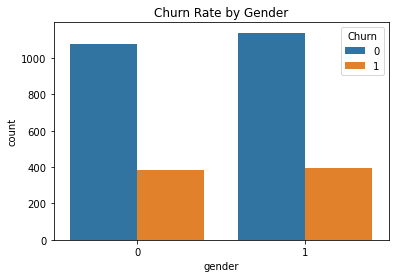


Contingency Table 4:
gender     0     1
Churn             
0       1079  1140
1        384   396

Question 4 - Gender and Churn:
Chi-square statistic: 0.06213024832996494
P-value: 0.8031601346661686
There is no significant relationship between gender and churn.


In [278]:
# Question 4: How does the churn rate vary based on the customers' gender?
# Bivariate analysis using bar plot
sns.countplot(x='gender', hue='Churn', data=df_db)
plt.title("Churn Rate by Gender")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_4 = pd.crosstab(df_db['Churn'], df_db['gender'])
print("\nContingency Table 4:")
print(contingency_table_4)

# Step 2: Perform chi-square test
chi2_4, p_value_4, _, _ = chi2_contingency(contingency_table_4)

# Step 3: Interpret the results
print("\nQuestion 4 - Gender and Churn:")
print(f"Chi-square statistic: {chi2_4}")
print(f"P-value: {p_value_4}")
if p_value_4 < alpha:
    print("There is a significant relationship between gender and churn.")
else:
    print("There is no significant relationship between gender and churn.")

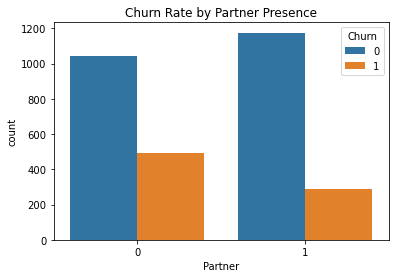


Contingency Table 5:
Partner     0     1
Churn              
0        1044  1175
1         494   286

Question 5 - Partner and Churn:
Chi-square statistic: 60.61362385892011
P-value: 6.945167513029977e-15
There is a significant relationship between partner and churn.


In [279]:
# Question 5: Does the presence of a partner influence the likelihood of churn?
# Bivariate analysis using bar plot
sns.countplot(x='Partner', hue='Churn', data=df_db)
plt.title("Churn Rate by Partner Presence")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_5 = pd.crosstab(df_db['Churn'], df_db['Partner'])
print("\nContingency Table 5:")
print(contingency_table_5)

# Step 2: Perform chi-square test
chi2_5, p_value_5, _, _ = chi2_contingency(contingency_table_5)

# Step 3: Interpret the results
print("\nQuestion 5 - Partner and Churn:")
print(f"Chi-square statistic: {chi2_5}")
print(f"P-value: {p_value_5}")
if p_value_5 < alpha:
    print("There is a significant relationship between partner and churn.")
else:
    print("There is no significant relationship between partner and churn.")

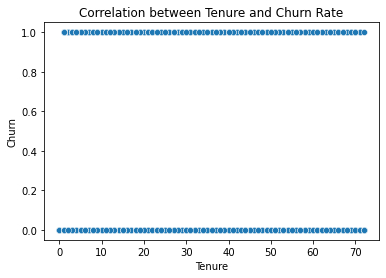


Contingency Table 6:
tenure  (0, 12]  (12, 24]  (24, 36]  (36, 48]  (48, 60]  (60, 72]
Churn                                                            
0           499       297       288       268       287       575
1           427       133        76        53        53        38

Question 6 - Tenure and Churn:
Chi-square statistic: 363.6996120231594
P-value: 1.96400745706313e-76
There is a significant relationship between tenure and churn.


In [280]:
# Question 6: Is there a correlation between the tenure of customers and their churn rate?

# Scatter plot of tenure and churn rate
sns.scatterplot(x='tenure', y='Churn', data=df_CustomerChurn)
plt.title("Correlation between Tenure and Churn Rate")
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_6 = pd.crosstab(df_db['Churn'], pd.cut(df_db['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]))
print("\nContingency Table 6:")
print(contingency_table_6)

# Step 2: Perform chi-square test
chi2_6, p_value_6, _, _ = chi2_contingency(contingency_table_6)

# Step 3: Interpret the results
print("\nQuestion 6 - Tenure and Churn:")
print(f"Chi-square statistic: {chi2_6}")
print(f"P-value: {p_value_6}")
if p_value_6 < alpha:
    print("There is a significant relationship between tenure and churn.")
else:
    print("There is no significant relationship between tenure and churn.")

In [281]:
df_CustomerChurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.850000,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.950001,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.849998,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.299999,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.699997,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.800000,1990.500000,0
5038,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.200000,7362.900000,0
5039,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.600000,346.450000,0
5040,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.400000,306.600000,1


# Modelling

In [282]:
# Drop the customerID column
df_CustomerChurn = df_CustomerChurn.drop('customerID', axis=1)

In [283]:
# Split the data into features (X) and the target variable (y)
X = df_CustomerChurn.drop('Churn', axis=1)
y = df_CustomerChurn['Churn']
# Split the data into training and testing sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)


In [284]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logreg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()

# Initialize empty lists to store the performance measures
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'k-NN']
accuracy = []
precision = []
recall = []
f1 = []
f2 = []

# Calculate the performance measures for each model
for model in [logreg, rf, svm, gb, knn]:
    model.fit(X_train, y_train)  # Fit the model on the training data
    accuracy.append(model.score(X_eval, y_eval))
    y_pred = model.predict(X_eval)
    precision.append(precision_score(y_eval, y_pred))
    recall.append(recall_score(y_eval, y_pred))
    f1.append(f1_score(y_eval, y_pred))
    f2.append(fbeta_score(y_eval, y_pred, beta=2))

# Create the dataframe
model_comparison = pd.DataFrame({'Model': models,
                                 'Accuracy': accuracy,
                                 'Precision': precision,
                                 'Recall': recall,
                                 'F1 Score': f1,
                                 'F2 Score': f2})


# Display the dataframe
print(model_comparison)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.809713   0.616000   0.616  0.616000  0.616000
1        Random Forest  0.805748   0.618421   0.564  0.589958  0.574104
2                  SVM  0.752230   0.000000   0.000  0.000000  0.000000
3    Gradient Boosting  0.813677   0.634783   0.584  0.608333  0.593496
4                 k-NN  0.787909   0.583333   0.504  0.540773  0.518092


## Evaluation of chosen model(s)

In [285]:
# Define the models
gradient_boosting = GradientBoostingClassifier()
random_forest = RandomForestClassifier()


In [286]:
# Chosen Models: Logistic Regression and Gradient Boosting
models = ['Gradient Boosting', 'Random Forest']
classifiers = [ gradient_boosting, random_forest]

In [287]:
# Evaluate models using k-Fold Cross-Validation
cv_results = []
for model in classifiers:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results.append(scores)

In [288]:
# Calculate mean and standard deviation of cross-validation results
mean_scores = [np.mean(scores) for scores in cv_results]
std_scores = [np.std(scores) for scores in cv_results]

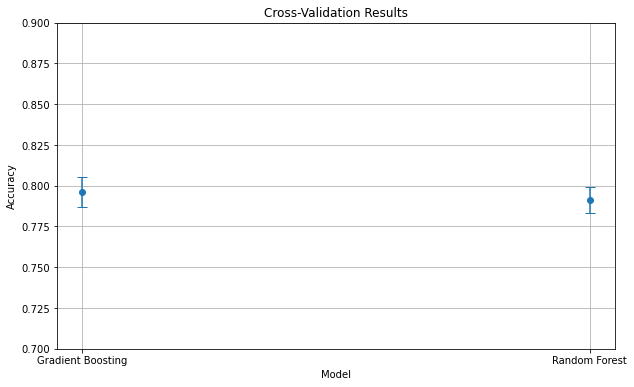

In [289]:
# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.errorbar(models, mean_scores, yerr=std_scores, fmt='o', capsize=5)
plt.title('Cross-Validation Results')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.grid(True)
plt.show()

## Hyperparameter tuning

In [290]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5)

# Perform hyperparameter testing
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.7949452833611605


# Future Predictions
Predict on the test set 

Visualize the results using a Confusion Matrix.

Provide a detailed explanation of the Confusion Matrix visual.

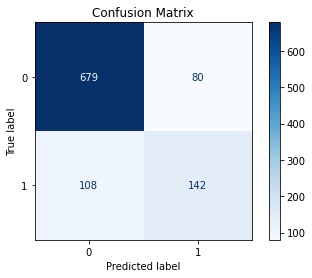

In [291]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Make predictions on the test set
y_pred = grid_search.predict(X_eval)

# Compute the confusion matrix
cm = confusion_matrix(y_eval, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_eval, y_eval, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [292]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
recall = recall_score(y_eval, y_pred)
f1 = f1_score(y_eval, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8136769078295342
Precision: 0.6396396396396397
Recall: 0.568
F1 Score: 0.6016949152542372


# Make a prediction based on new data (df_test)

In [293]:
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,1,0,0,0,12,1,2,1,0,0,0,0,2,0,0,1,2,84.45,1059.55
1,4568-TTZRT,1,0,0,0,9,1,0,2,1,1,1,1,1,1,0,0,3,20.40,181.80
2,9513-DXHDA,1,0,0,0,27,1,0,0,2,0,2,2,2,2,1,0,2,81.70,2212.55
3,2640-PMGFL,1,0,0,1,27,1,2,1,0,0,0,2,0,0,0,1,2,79.50,2180.55
4,3801-HMYNL,1,0,1,1,1,1,0,1,0,0,0,0,2,2,0,0,3,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,0,0,0,0,7,1,2,1,0,0,0,0,0,0,0,1,0,75.10,552.95
1996,3557-HTYWR,0,0,0,0,47,1,2,0,2,2,0,2,0,2,2,0,3,74.05,3496.30
1997,4816-JBHOV,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,1,2,44.70,93.70
1998,8920-NAVAY,1,1,0,0,62,1,2,1,0,2,2,2,2,2,1,1,0,110.75,7053.35


In [294]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   int32  
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   int32  
 4   Dependents        2000 non-null   int32  
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   int32  
 7   MultipleLines     2000 non-null   int32  
 8   InternetService   2000 non-null   int32  
 9   OnlineSecurity    2000 non-null   int32  
 10  OnlineBackup      2000 non-null   int32  
 11  DeviceProtection  2000 non-null   int32  
 12  TechSupport       2000 non-null   int32  
 13  StreamingTV       2000 non-null   int32  
 14  StreamingMovies   2000 non-null   int32  
 15  Contract          2000 non-null   int32  
 16  PaperlessBilling  2000 non-null   int32  


In [295]:
# Fit the GradientBoostingClassifier model with the training data
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [296]:
# Load the trained model (assuming it's stored in the 'model' variable)
model = GradientBoostingClassifier()  # Instantiate the model
model = model.fit(X_train, y_train)  # Fit the model to the training data

# Prepare the df_test dataset
features = df_test.drop('customerID', axis=1)

# Make predictions on the df_test dataset
churn_predictions = model.predict(features)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'customerID': df_test['customerID'], 'Churn_Predictions': churn_predictions})

# Display the predictions DataFrame
print(predictions_df)

      customerID  Churn_Predictions
0     7613-LLQFO                  1
1     4568-TTZRT                  0
2     9513-DXHDA                  0
3     2640-PMGFL                  0
4     3801-HMYNL                  1
...          ...                ...
1995  7912-SYRQT                  1
1996  3557-HTYWR                  0
1997  4816-JBHOV                  1
1998  8920-NAVAY                  0
1999  1699-TLDLZ                  0

[2000 rows x 2 columns]


In [302]:
# Filter the predictions DataFrame for churned customers
churned_customers = predictions_df[predictions_df['Churn_Predictions'] == 1]

# Display the features of churned customers
churned_customer_features = df_test.merge(churned_customers, on='customerID')
churned_customer_features.drop('Churn_Predictions', axis=1, inplace=True)
churned_customer_features

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,1,0,0,0,12,1,2,1,0,0,0,0,2,0,0,1,2,84.45,1059.55
1,3801-HMYNL,1,0,1,1,1,1,0,1,0,0,0,0,2,2,0,0,3,89.15,89.15
2,9685-WKZGT,1,1,0,0,14,1,2,1,0,0,0,0,0,0,0,1,2,74.95,1036.75
3,6127-ISGTU,0,0,1,0,16,1,2,1,0,0,0,0,2,0,0,1,2,84.95,1378.25
4,1761-AEZZR,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.55,79.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,8008-HAWED,1,0,0,0,14,0,1,0,0,0,2,0,2,2,0,1,2,50.75,712.75
455,2694-CIUMO,0,0,0,0,12,1,2,1,0,0,0,2,0,0,0,1,1,79.55,958.25
456,9692-TUSXH,0,0,0,0,18,1,0,1,2,0,0,0,2,2,0,1,2,96.05,1740.70
457,7912-SYRQT,0,0,0,0,7,1,2,1,0,0,0,0,0,0,0,1,0,75.10,552.95


In [308]:
# Filter the predictions DataFrame for churned customers
churned_customers = predictions_df[predictions_df['Churn_Predictions'] == 1]

# Group churned customers by each feature and calculate the count
churned_customer_counts = {}
for column in churned_customer_features.columns.drop('customerID'):
    churned_customer_counts[column] = churned_customer_features.groupby(column)['customerID'].count()

# Display the count of churned customers by each feature
for feature, count in churned_customer_counts.items():
    print(f"Churned Customer Counts by {feature}:")
    print(count)
    print()


Churned Customer Counts by gender:
gender
0    232
1    227
Name: customerID, dtype: int64

Churned Customer Counts by SeniorCitizen:
SeniorCitizen
0    320
1    139
Name: customerID, dtype: int64

Churned Customer Counts by Partner:
Partner
0    324
1    135
Name: customerID, dtype: int64

Churned Customer Counts by Dependents:
Dependents
0    407
1     52
Name: customerID, dtype: int64

Churned Customer Counts by tenure:
tenure
1     117
2      35
3      24
4      28
5      16
6      12
7      13
8      12
9      14
10     13
11      8
12     14
13      4
14     10
15      8
16      7
17      8
18      9
19      4
20      3
21      4
22      3
23      3
24      8
25      4
26      6
27      3
28      3
29      5
30      5
31      5
32      4
33      2
34      4
35      2
36      4
37      5
38      1
39      2
41      2
42      3
43      1
45      1
46      2
47      1
49      1
50      3
51      1
53      1
54      1
55      2
56      3
57      1
58      2
60      1
62      1
Name: 

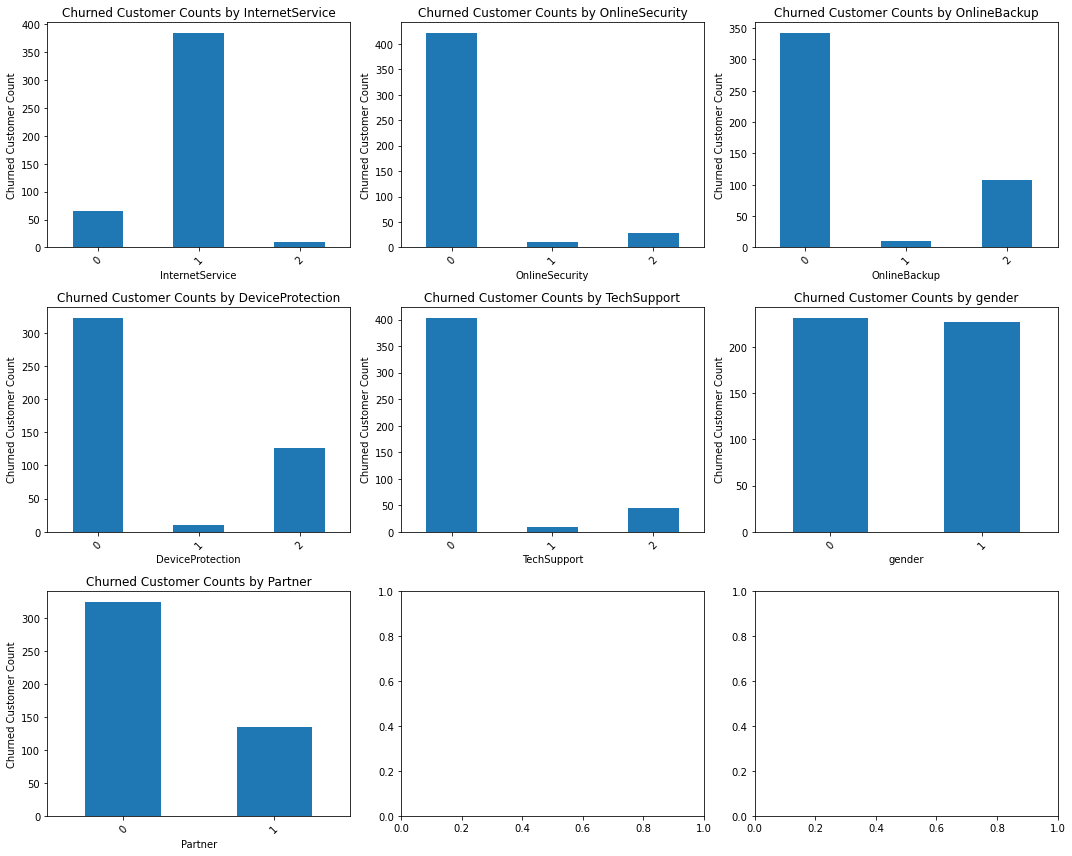

In [312]:
# Define the features to plot
features_to_plot = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'gender', 'Partner']

# Create subplots for the features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over the features and create bar plots
for feature, ax in zip(features_to_plot, axes.flatten()):
    churned_counts = churned_customer_counts[feature]  # Get churned customer counts for the feature
    
    if not churned_counts.empty:  # Check if the churned_counts is not empty
        # Create the bar plot
        churned_counts.plot(kind='bar', ax=ax)
        ax.set_title(f"Churned Customer Counts by {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Churned Customer Count")
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.axis('off')  # Exclude empty plots by turning off the axis

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

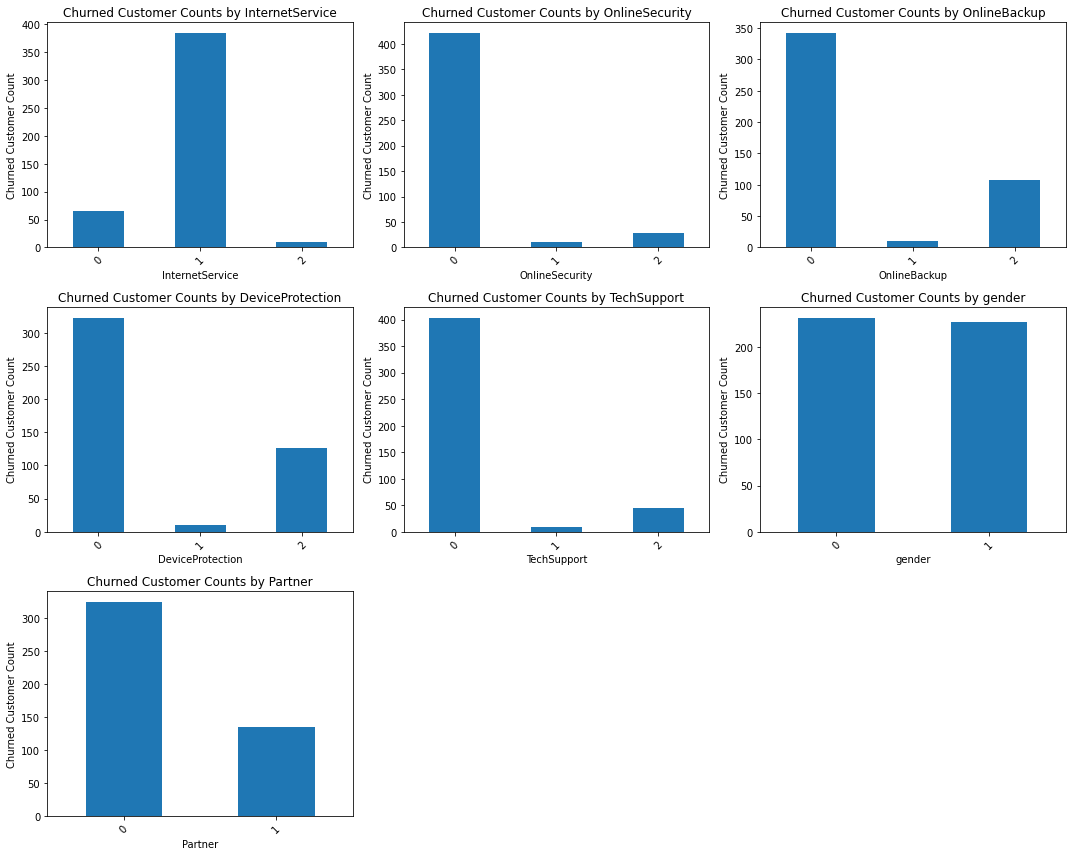

In [313]:
# Define the features to plot
features_to_plot = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'gender', 'Partner']

# Create subplots for the features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over the features and create bar plots
for i, feature in enumerate(features_to_plot):
    churned_counts = churned_customer_counts[feature]  # Get churned customer counts for the feature
    
    # Exclude features with empty plots
    if not churned_counts.empty:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        # Create the bar plot
        churned_counts.plot(kind='bar', ax=ax)
        ax.set_title(f"Churned Customer Counts by {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Churned Customer Count")
        ax.tick_params(axis='x', rotation=45)
    else:
        features_to_plot.remove(feature)  # Remove feature from the list of features to plot

# Remove empty subplots
if len(features_to_plot) < 9:
    for i in range(len(features_to_plot), 9):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

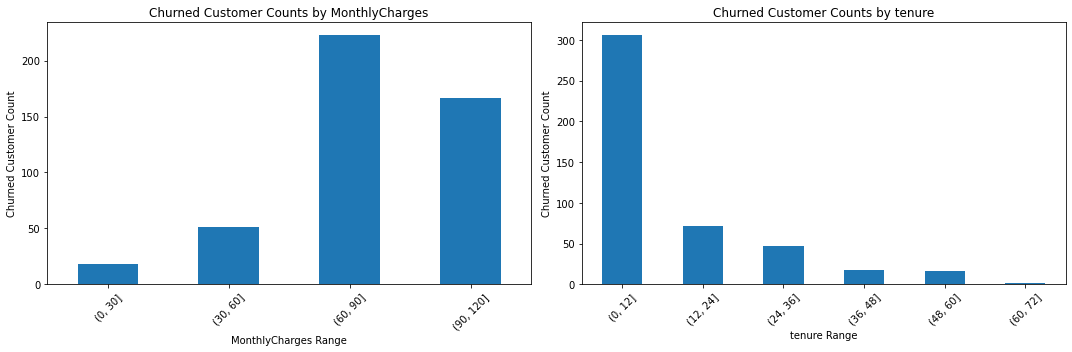

In [310]:

# Define the features and their corresponding bin ranges
features_to_plot = {
    'MonthlyCharges': [0, 30, 60, 90, 120],
    'tenure': [0, 12, 24, 36, 48, 60, 72],
}

# Create subplots for the features
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(15, 5))

# Iterate over the features and create grouped bar plots
for i, (feature, bins) in enumerate(features_to_plot.items()):
    churned_counts = churned_customer_counts[feature]  # Get churned customer counts for the feature
    
    # Bin the values into intervals
    churned_counts_grouped = churned_counts.groupby(pd.cut(churned_counts.index, bins=bins)).sum()
    
    # Create the bar plot
    churned_counts_grouped.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Churned Customer Counts by {feature}")
    axes[i].set_xlabel(f"{feature} Range")
    axes[i].set_ylabel("Churned Customer Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


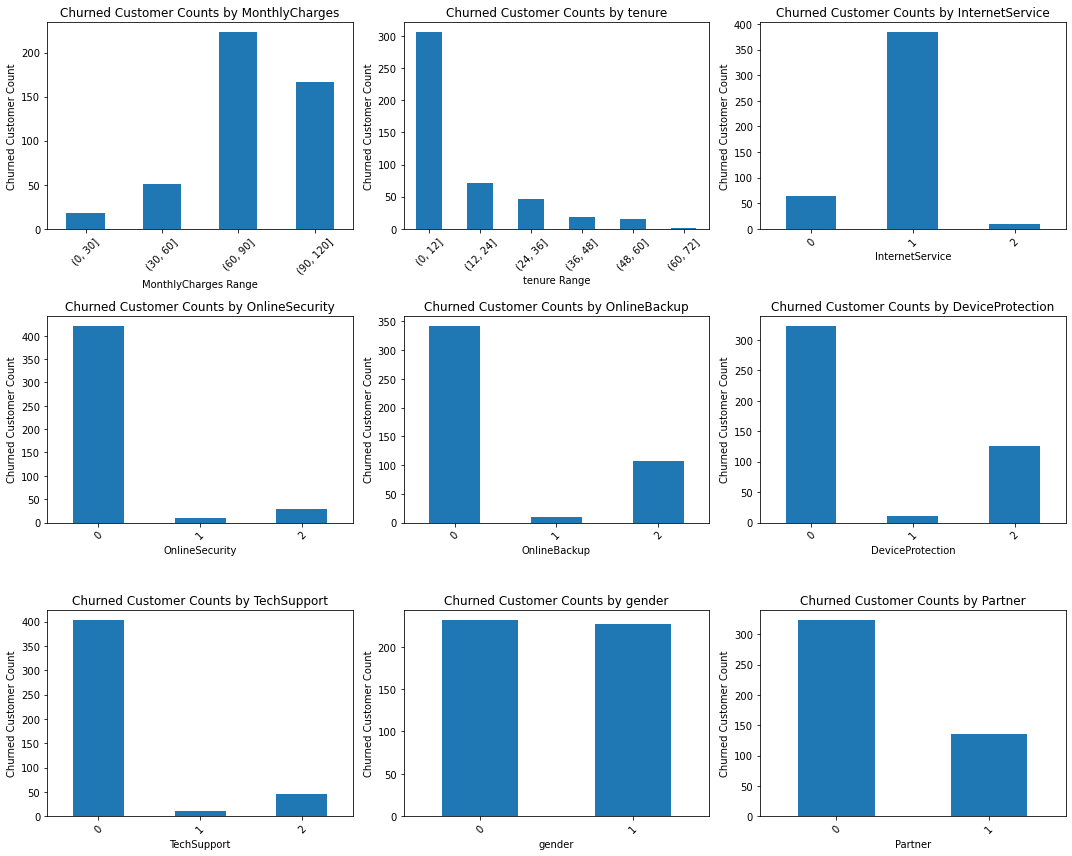

In [318]:
# Define the features to plot and their corresponding bin ranges
features_to_plot = {
    'MonthlyCharges': [0, 30, 60, 90, 120],
    'tenure': [0, 12, 24, 36, 48, 60, 72],
    'InternetService': None,
    'OnlineSecurity': None,
    'OnlineBackup': None,
    'DeviceProtection': None,
    'TechSupport': None,
    'gender': None,
    'Partner': None
}

# Create subplots for the features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate over the features and create grouped bar plots
for i, (feature, bins) in enumerate(features_to_plot.items()):
    if i < 9:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
    else:
        break
    
    churned_counts = churned_customer_counts[feature]  # Get churned customer counts for the feature
    
    # Exclude features with empty plots
    if churned_counts.empty and bins is None:
        continue
    
    # Bin the values into intervals if bins are specified
    if bins is not None:
        churned_counts_grouped = churned_counts.groupby(pd.cut(churned_counts.index, bins=bins)).sum()
    else:
        churned_counts_grouped = churned_counts
    
    # Create the bar plot
    churned_counts_grouped.plot(kind='bar', ax=ax)
    ax.set_title(f"Churned Customer Counts by {feature}")
    ax.set_xlabel(f"{feature} Range" if bins is not None else feature)
    ax.set_ylabel("Churned Customer Count")
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
if len(features_to_plot) < 9:
    for i in range(len(features_to_plot), 9):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

